In [2]:
# Import Pandas, Numpy, Seaborn, Matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn as sklearn
from sklearn import metrics
from sklearn.preprocessing import RobustScaler

import pickle
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

# load dataset
df = pd.read_csv('./insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#The factors that might affect the health insurance cost are:-

#Age: Age of the beneficiary
#Sex: Gender of the beneficiary
#BMI: Body Mass Index (kg / m^2)
#Children: Number of children / Number of dependants
#Smoker: Does smoke or not
#Region: Residential area of the beneficiary '''

In [8]:
######################################################
# Exploratory Data Analysis
######################################################

# Statistics
def check_df(dataframe, head=5):
    """
    Prints out the shape, types, head, missing values and quantiles of the dataframe
    Parameters
    ----------
    dataframe
    head

    Returns
    -------
    No return
    """
    print("# --*-- Shape --*-- #")
    print(dataframe.shape)
    print("#--*-- Types --*-- #")
    print(dataframe.dtypes)
    print("#--*-- Head --*-- #")
    print(dataframe.head(head))
    print("#--*-- Tail --*-- #")
    print(dataframe.tail(head))
    print("#--*-- Missing Values --*-- #")
    print(dataframe.isnull().sum())
check_df(df, 5)
df.describe()

# --*-- Shape --*-- #
(1338, 7)
#--*-- Types --*-- #
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
#--*-- Head --*-- #
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
#--*-- Tail --*-- #
      age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  n

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [11]:
# Checking categorical and numeric values 
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Determines the categorical, numerical and categorical but cardinal columns.

    Parameters
    ------
        dataframe: dataframe
                dataframe whihc inludes the columns
        cat_th: int, optional
                class threshold valuse for determining numeric but categorical variable
        car_th: int, optional
                class threshold valuse for determining categoric but cardinal variable

    Returns
    ------
        cat_cols: list
                categorical columns
        num_cols: list
                numerical columns
        cat_but_car: list
                categoric but cardinal columns

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total columns
        cat_cols = all_cat_cols + num_but_cat - cat_but_car
        num_cols = all_num_cols - num_but_cat
    """

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")

    # cat cols
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    print(f'init cat_cols: {len(cat_cols)}')

    # num cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    print(f'init num_cols: {len(num_cols)}')

    # num but cat cols
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat but car cols
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    print(f'cat_but_car: {len(cat_but_car)}')

    # cat cols
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    print(f'final cat_cols: {len(cat_cols)}')

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f'final num_cols: {len(num_cols)}')

    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 1338
Variables: 7
init cat_cols: 3
init num_cols: 4
num_but_cat: 1
cat_but_car: 0
final cat_cols: 4
final num_cols: 3


In [ ]:
## Data visualization

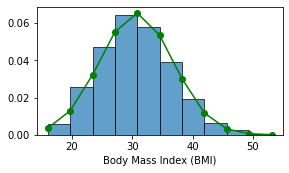

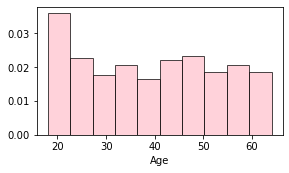

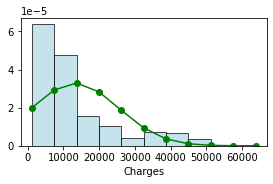

In [51]:
'''Few observations:-

The minimum of an bmi is 15.96
Around 75% of the bmi are below 35.00
The maximum of an bmi is 53.13 
'''

# Histrogram of Body Mass Index (kg / m^2)

import matplotlib.pyplot as plt
from scipy import stats

plt.subplot(3,3,1)
_, bins, _ = plt.hist(df.bmi, bins = 10,
                      density = 0.5, alpha = 0.7,
                      ec= 'black' )
mu, sigma = stats.norm.fit(df.bmi)
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line, 'g-o')
plt.xlabel("Body Mass Index (BMI)")
plt.show()



plt.subplot(3,3,2)
_, bins, _ = plt.hist(df.age, bins = 10,
                      density = 0.5, alpha = 0.7, 
                      ec= 'black', color='pink' )
mu, sigma = stats.norm.fit(df.age)
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.xlabel("Age")
plt.show()

plt.subplot(3,3,1)
_, bins, _ = plt.hist(df.charges, bins = 10,
                      density = 0.5, alpha = 0.7,
                      ec= 'black' , color = 'lightblue')
mu, sigma = stats.norm.fit(df.charges)
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line, 'g-o')
plt.xlabel("Charges")
plt.show()

plt.show()

In [ ]:
# bmi looks normally distributed and the average bmi stacked at 30.7, indicating that the people in the data were close to obesity.
# Age seems be be distributed uniformly
# Charges are highly right skewed

In [53]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.bmi),stats.skew(df.age),stats.skew(df.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


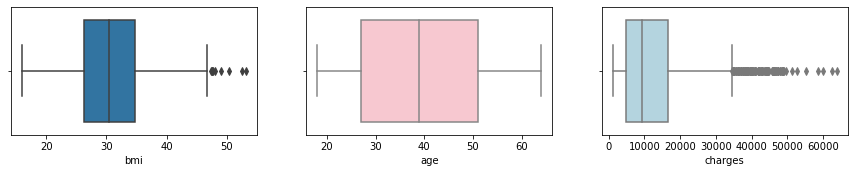

In [60]:
#Checking for the outliers
plt.figure(figsize= (15,8))
plt.subplot(3,3,1)
sns.boxplot(x= df.bmi)


plt.subplot(3,3,2)
sns.boxplot(x= df.age, color='pink')


plt.subplot(3,3,3)
sns.boxplot(x= df.charges, color='lightblue')

plt.show()

In [ ]:
# bmi has a few extreme values, the line after 45 has dots, these are outliers as they are not included in the other watch box, ie they are nowhere near the quadrants.
# Looking at the bmi graph, it is seen that most of the individuals have a bmi between 25 and 35, but the observations on the right are outliers far from the population.
# charges as it is highly skewed, there are quiet a lot of extreme values

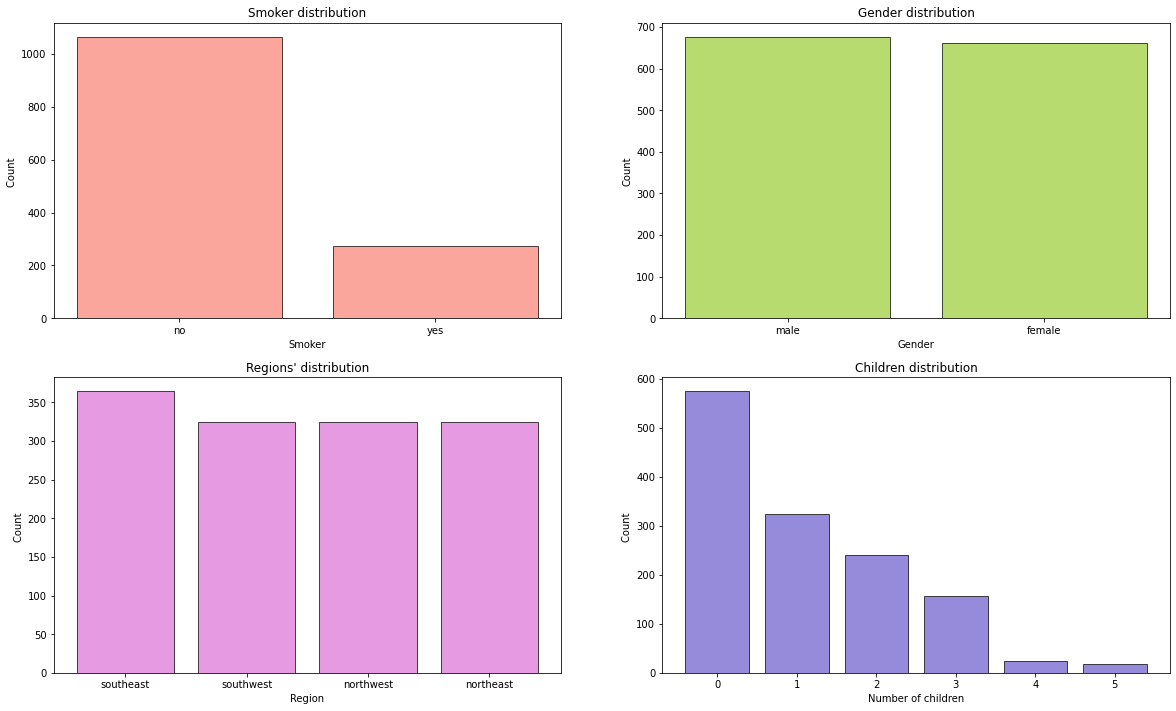

In [66]:
plt.figure(figsize=(20,25))


x = df.smoker.value_counts().index    #Values for x-axis
y = [df['smoker'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'salmon',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Smoker')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = df.sex.value_counts().index    #Values for x-axis
y1 = [df['sex'].value_counts()[j] for j in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'yellowgreen',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = df.region.value_counts().index    #Values for x-axis
y2 = [df['region'].value_counts()[k] for k in x2]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'orchid',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = df.children.value_counts().index    #Values for x-axis
y3 = [df['children'].value_counts()[l] for l in x3]   # Count of each class on y-axis

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'slateblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Number of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()

In [ ]:
# There are a lot more non-smokers than there are smokers in the data
# Instances are distributed evenly accross all regions
# Gender is also distributed evenly
# Most instances have less than 2 children and very few have 4 or 5 children Bi-variate distribution of every possible attribute pair

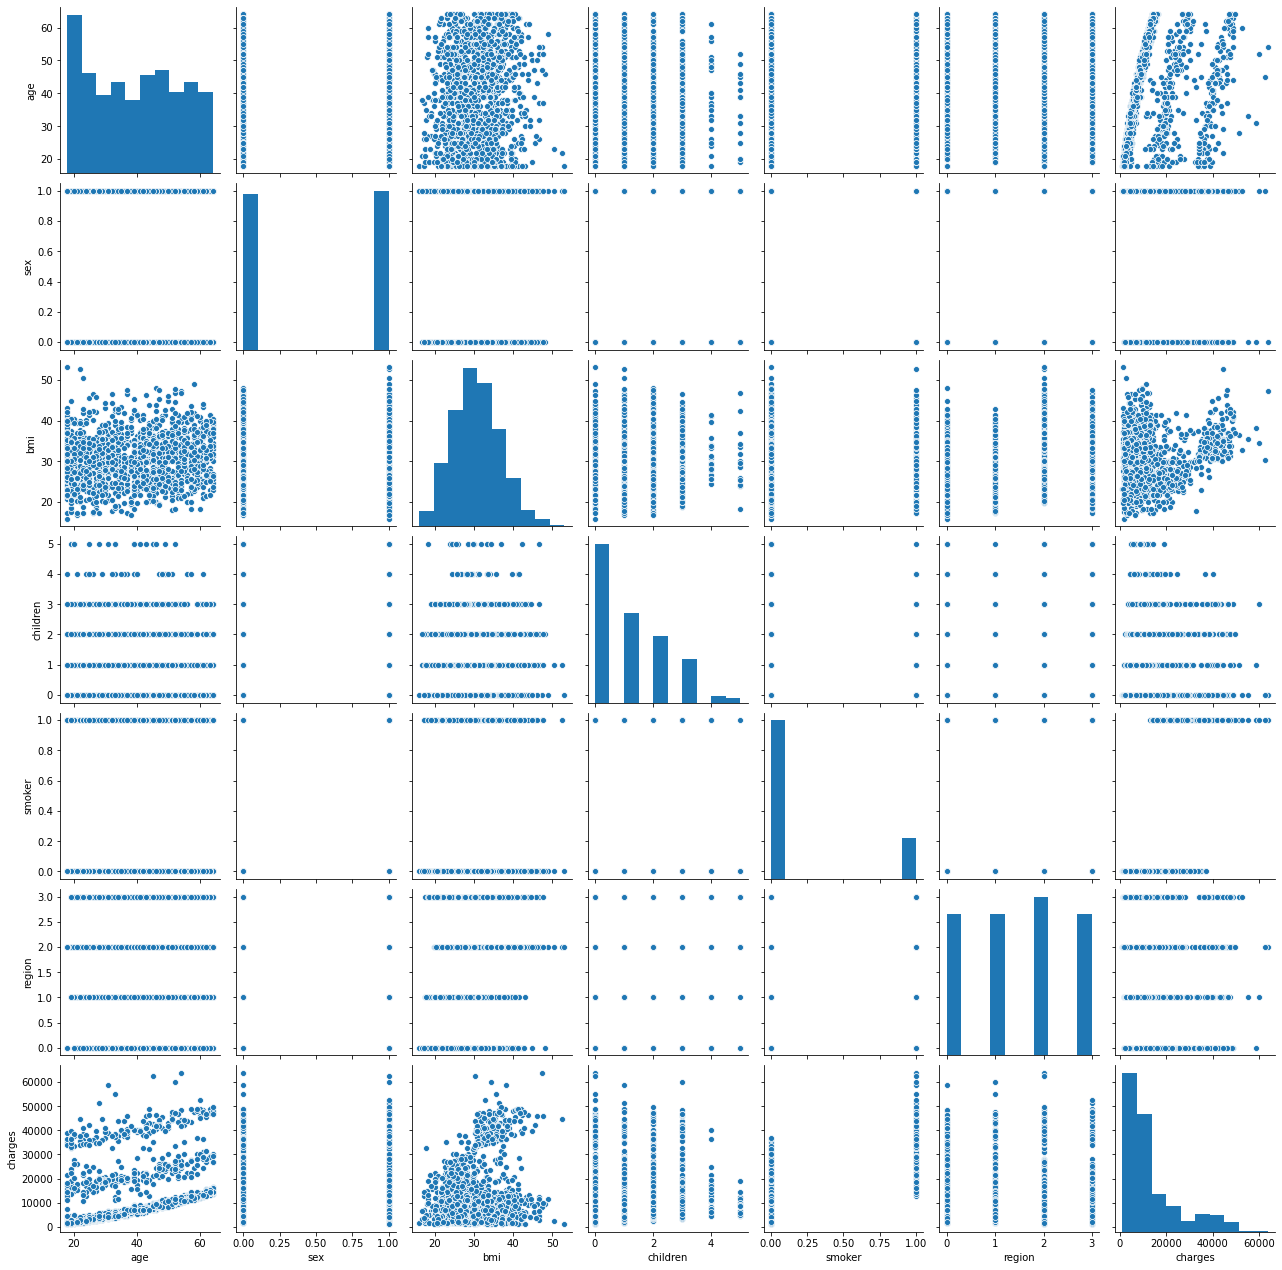

In [69]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score 
import copy

df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded)  #pairplot
plt.show()

In [71]:
# Create new feature from bmi index
bins = [-np.inf,18.5, 25, 30, np.inf]
labels = ["underweight","healthy","overweight","obese"]
df['bmi_cat'] = pd.cut(df['bmi'], bins=bins, labels=labels)

# Create new feature from age
bins = [-np.inf,17, 25, 40, 60, np.inf]
labels = ["young","genz","mature","senior", "old"]
df['age_cat'] = pd.cut(df['age'], bins=bins, labels=labels)
       
df.head()        

,age,sex,bmi,children,smoker,region,charges,bmi_cat,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,genz
1,18,male,33.770,1,no,southeast,1725.55230,obese,genz
2,28,male,33.000,3,no,southeast,4449.46200,obese,mature
3,33,male,22.705,0,no,northwest,21984.47061,healthy,mature
4,32,male,28.880,0,no,northwest,3866.85520,overweight,mature


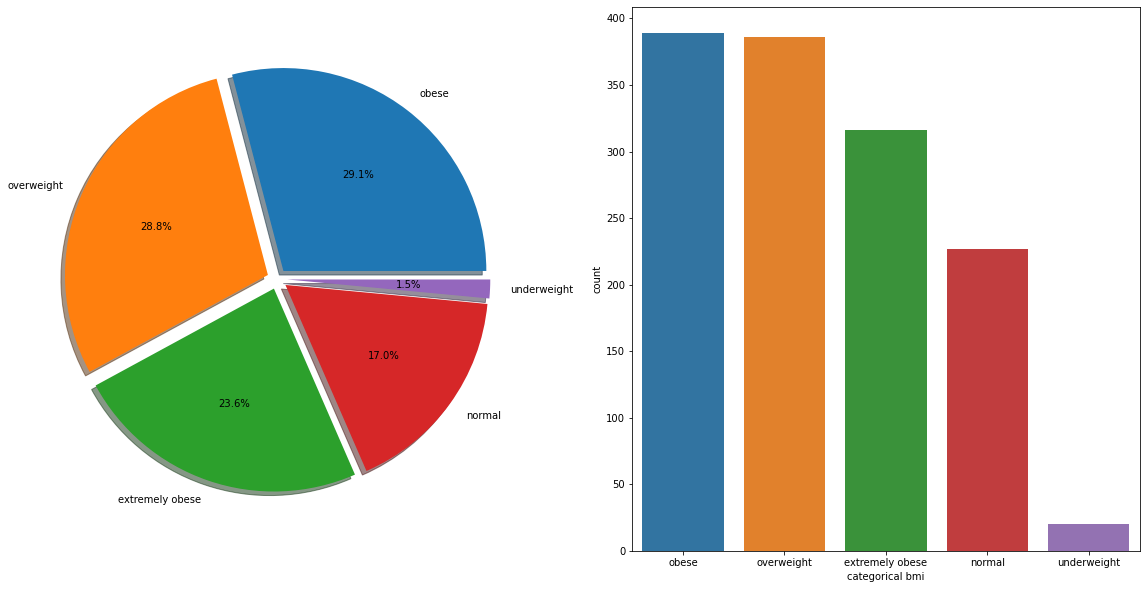

In [92]:
df_with_bmi = []
for a in list(range(1338)): 
  row = df.iloc[a]
  if row.bmi <18.5:
    df_with_bmi.append("underweight")
  elif row.bmi >=18.5 and row.bmi<=25:
    df_with_bmi.append("normal")
  elif row.bmi>25 and row.bmi<=30:
    df_with_bmi.append("overweight")
  elif row.bmi>30 and row.bmi<=35:
    df_with_bmi.append("obese")
  else:
    df_with_bmi.append("extremely obese")
    
df['categorical bmi'] = df_with_bmi
df
plt.rcParams["figure.figsize"] = (20,10)

explode = (0.05, 0.05, 0.05, 0.05, 0.05)

plt.subplot(1,2,1)
plt.pie(df['categorical bmi'].value_counts(), explode = explode, labels= df['categorical bmi'].value_counts().index, autopct = '%1.1f%%', shadow=True)

plt.subplot(1,2,2)
bmi_count = sns.countplot(x="categorical bmi", data=df, order=df['categorical bmi'].value_counts().index)




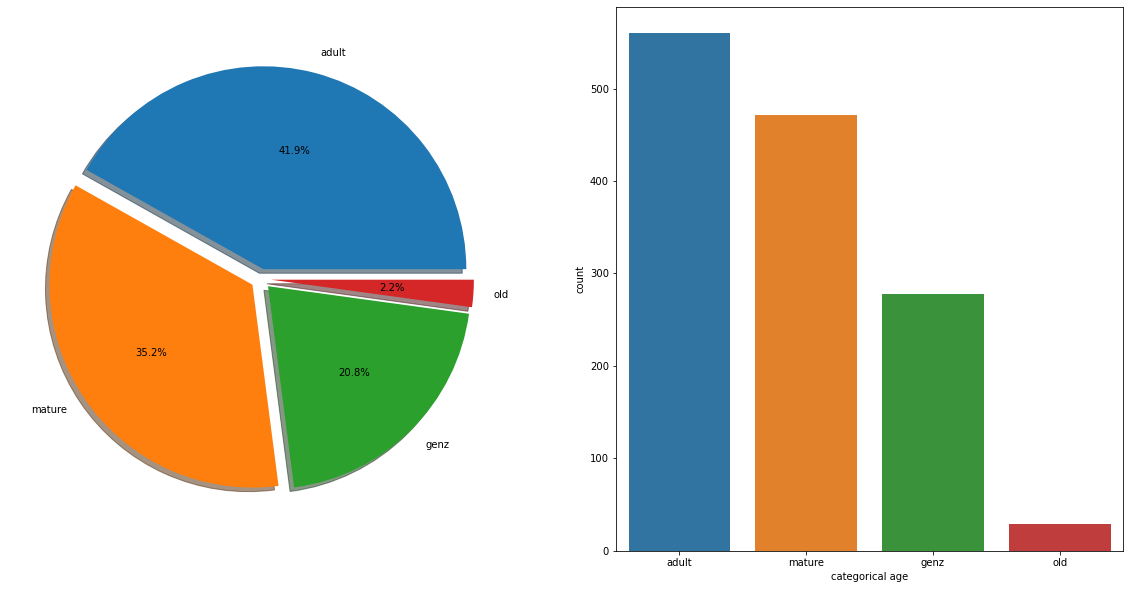

In [91]:
df_with_age = []
for a in list(range(1338)): 
  row = df.iloc[a]
  if row.age <18:
    df_with_age.append("young")
  elif row.age >=18 and row.age<=24:
    df_with_age.append("genz")
  elif row.age>24 and row.age<=45:
    df_with_age.append("adult")
  elif row.age>46 and row.age<=65:
    df_with_age.append("mature")
  else:
    df_with_age.append("old")
    
df['categorical age'] = df_with_age
df
plt.rcParams["figure.figsize"] = (20,10)

explode = (0.05, 0.05, 0.05, 0.05)

plt.subplot(1,2,1)
plt.pie(df['categorical age'].value_counts(), explode = explode, labels= df['categorical age'].value_counts().index, autopct = '%1.1f%%', shadow=True)

plt.subplot(1,2,2)
age_count = sns.countplot(x="categorical age", data=df, order=df['categorical age'].value_counts().index)

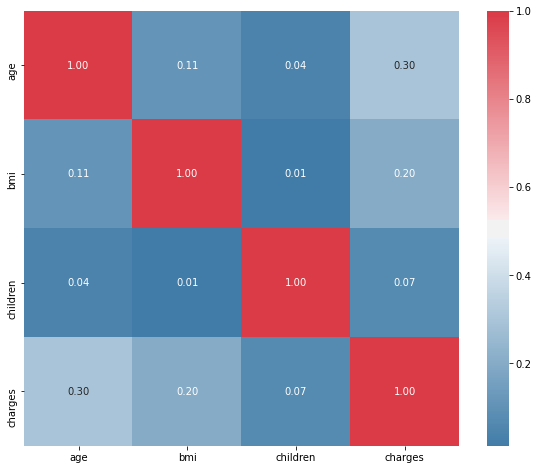

In [93]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax,annot = True, fmt='.2f')
plt.show()

In [ ]:
#BMI vs Cinsiyet
#Cinsiyet kategorik bir veri olduğu için korelasyon matrisinde göremedik. Bu sebeple cinsiyete bir operasyon uygulamamız gereklidir.
#LabelEncoder uygulayarak cinsiyeti sayısal hale getirebiliriz.

In [95]:
le = LabelEncoder() 
le.fit(df.sex.drop_duplicates()) # sadece female ve male olarak fit ediyorum
df.sex = le.transform(df.sex) # veri setine uyguluyoruz
df.sex 

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

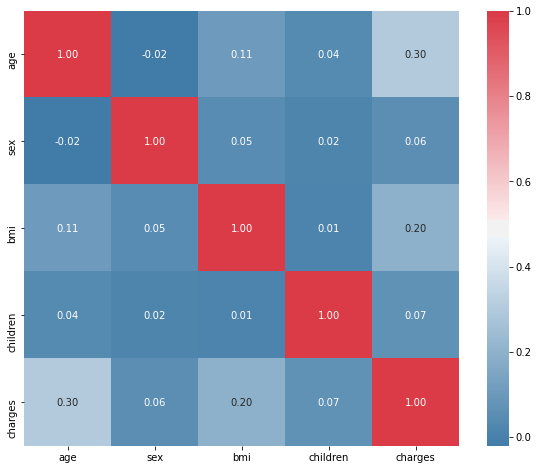

In [96]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax,annot = True, fmt='.2f')
plt.show()

Text(0.5, 1.0, 'Charge Vs BMI')

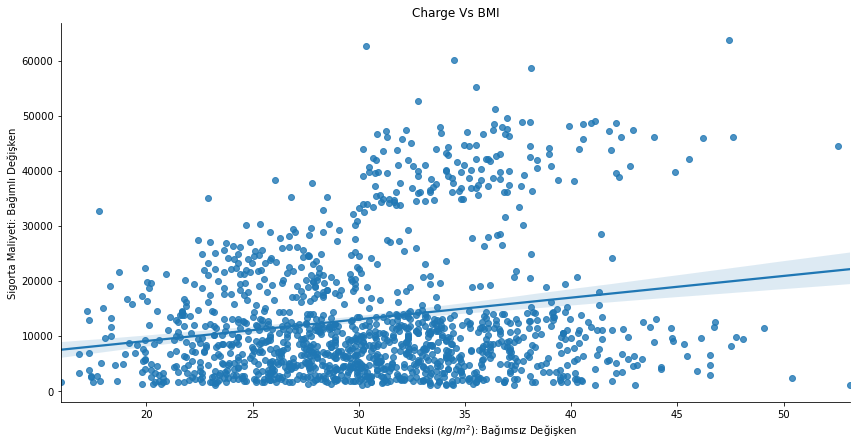

In [98]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Vucut Kütle Endeksi $(kg/m^2)$: Bağımsız Değişken')
plt.ylabel('Sigorta Maliyeti: Bağımlı Değişken')
plt.title('Charge Vs BMI')

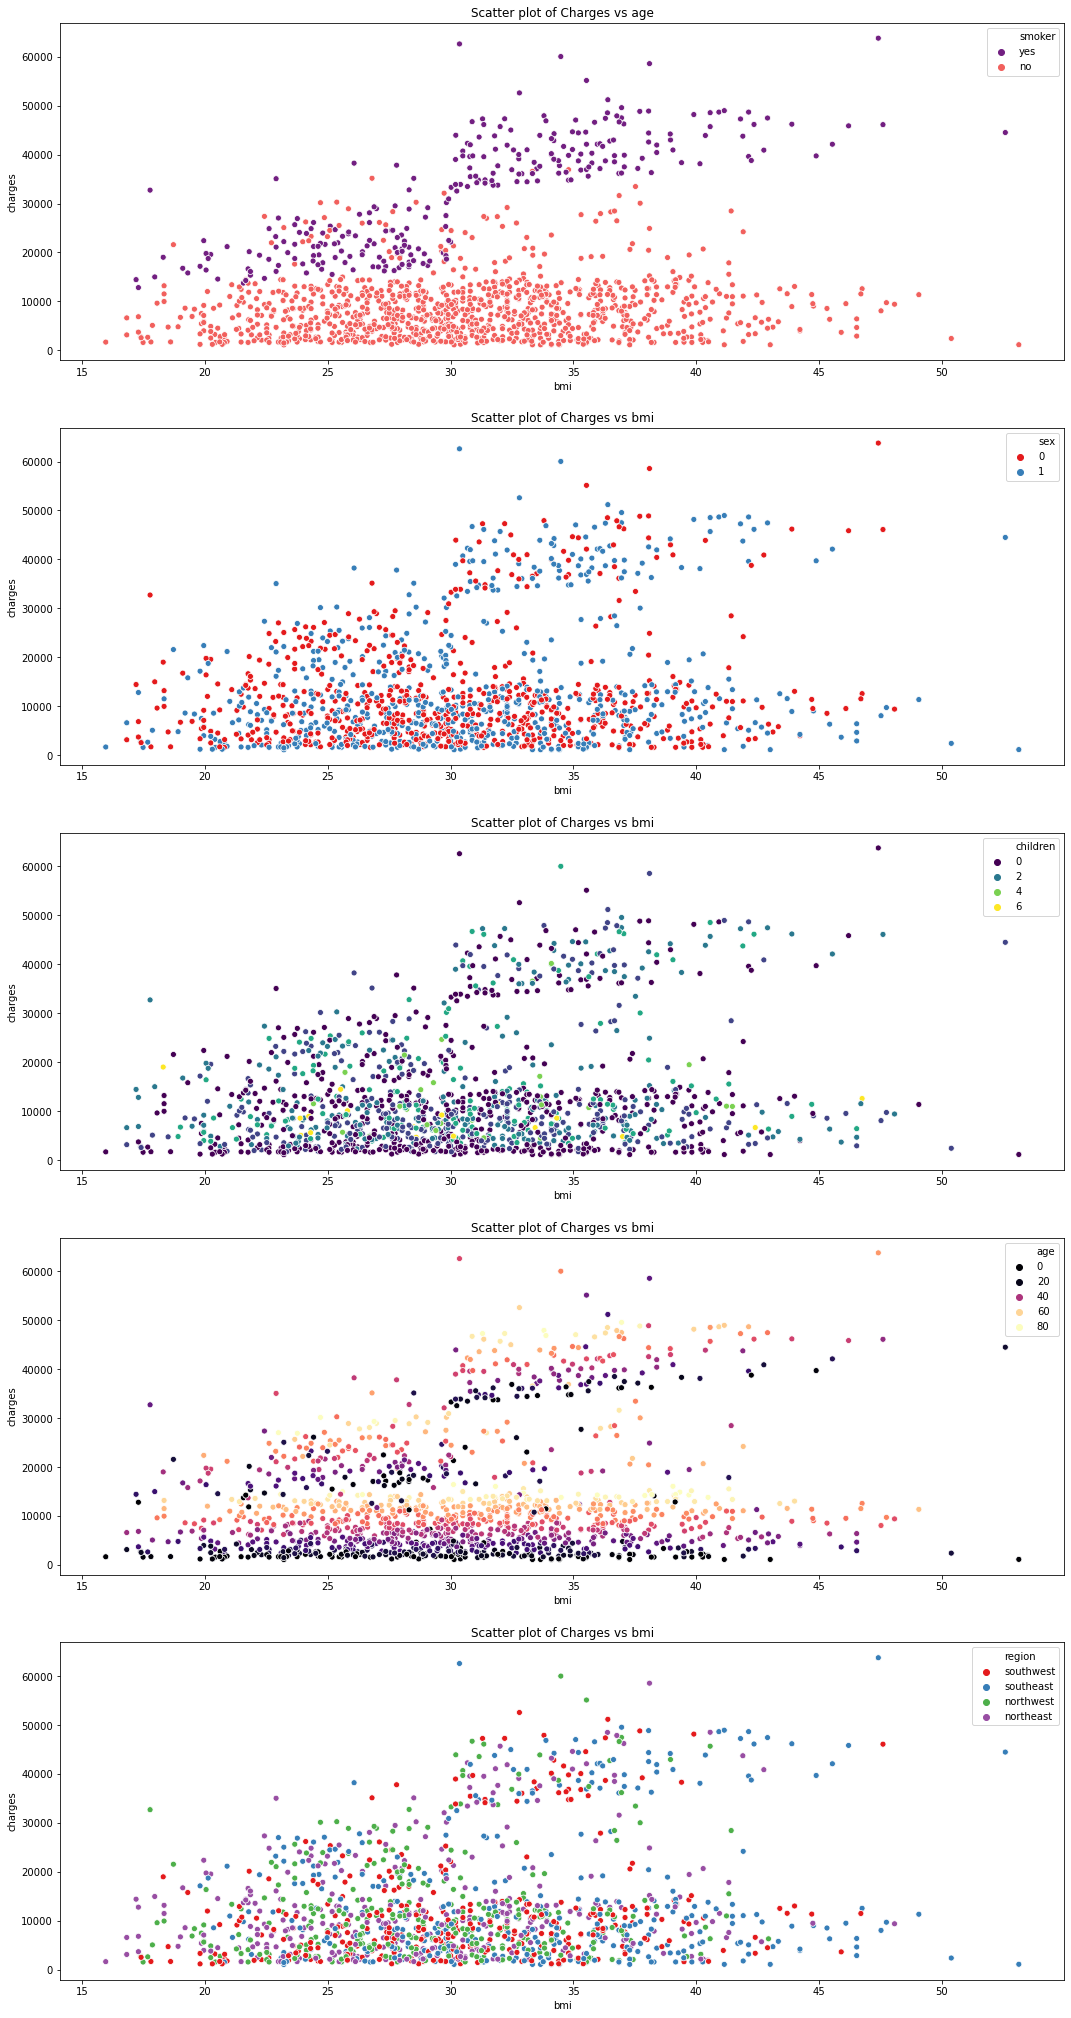

In [100]:
f = plt.figure(figsize=(18,36))
ax = f.add_subplot(511)
sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='smoker')
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(512)
sns.scatterplot(x='bmi',y='charges',data=df,palette='Set1',hue='sex')
ax.set_title('Scatter plot of Charges vs bmi')

ax = f.add_subplot(513)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='children')
ax.set_title('Scatter plot of Charges vs bmi')

ax = f.add_subplot(514)
sns.scatterplot(x='bmi',y='charges',data=df,palette='magma',hue='age')
ax.set_title('Scatter plot of Charges vs bmi')

ax = f.add_subplot(515)
sns.scatterplot(x='bmi',y='charges',data=df,palette='Set1',hue='region')
ax.set_title('Scatter plot of Charges vs bmi')

plt.show()

In [116]:
#Modelling 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn import metrics

from sklearn.model_selection import cross_val_score

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])
df.head()


,age,sex,bmi,children,smoker,region,charges,bmi_cat,age_cat,categorical bmi,categorical age
0,19,0,27.900,0,1,3,16884.92400,overweight,genz,overweight,genz
1,18,1,33.770,1,0,2,1725.55230,obese,genz,obese,genz
2,28,1,33.000,3,0,2,4449.46200,obese,mature,obese,adult
3,33,1,22.705,0,0,1,21984.47061,healthy,mature,normal,adult
4,32,1,28.880,0,0,1,3866.85520,overweight,mature,overweight,adult


In [ ]:


## Preparation of X and y variable for input and output layers ##



In [121]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score 

df

,age,sex,bmi,children,smoker,region,charges,bmi_cat,age_cat,categorical bmi,categorical age
0,19,0,27.900,0,1,3,16884.92400,overweight,genz,overweight,genz
1,18,1,33.770,1,0,2,1725.55230,obese,genz,obese,genz
2,28,1,33.000,3,0,2,4449.46200,obese,mature,obese,adult
3,33,1,22.705,0,0,1,21984.47061,healthy,mature,normal,adult
4,32,1,28.880,0,0,1,3866.85520,overweight,mature,overweight,adult
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,obese,senior,obese,mature
1334,18,0,31.920,0,0,0,2205.98080,obese,genz,obese,genz
1335,18,0,36.850,0,0,2,1629.83350,obese,genz,extremely obese,genz
1336,21,0,25.800,0,0,3,2007.94500,overweight,genz,overweight,genz


In [122]:
#scaling
col_t = MinMaxScaler()
df[['age', 'bmi', 'children']] = col_t.fit_transform(df[['age', 'bmi', 'children']])
df

,age,sex,bmi,children,smoker,region,charges,bmi_cat,age_cat,categorical bmi,categorical age
0,0.021739,0,0.321227,0.0,1,3,16884.92400,overweight,genz,overweight,genz
1,0.000000,1,0.479150,0.2,0,2,1725.55230,obese,genz,obese,genz
2,0.217391,1,0.458434,0.6,0,2,4449.46200,obese,mature,obese,adult
3,0.326087,1,0.181464,0.0,0,1,21984.47061,healthy,mature,normal,adult
4,0.304348,1,0.347592,0.0,0,1,3866.85520,overweight,mature,overweight,adult
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,1,0.403820,0.6,0,1,10600.54830,obese,senior,obese,mature
1334,0.000000,0,0.429379,0.0,0,0,2205.98080,obese,genz,obese,genz
1335,0.000000,0,0.562012,0.0,0,2,1629.83350,obese,genz,extremely obese,genz
1336,0.065217,0,0.264730,0.0,0,3,2007.94500,overweight,genz,overweight,genz


In [123]:
one_hot_enc = OneHotEncoder(handle_unknown='ignore')
region =  pd.DataFrame(one_hot_enc.fit_transform(df[['region']]).toarray())
one_data = df.join(region)
one_data

,age,sex,bmi,children,smoker,region,charges,bmi_cat,age_cat,categorical bmi,categorical age,0,1,2,3
0,0.021739,0,0.321227,0.0,1,3,16884.92400,overweight,genz,overweight,genz,0.0,0.0,0.0,1.0
1,0.000000,1,0.479150,0.2,0,2,1725.55230,obese,genz,obese,genz,0.0,0.0,1.0,0.0
2,0.217391,1,0.458434,0.6,0,2,4449.46200,obese,mature,obese,adult,0.0,0.0,1.0,0.0
3,0.326087,1,0.181464,0.0,0,1,21984.47061,healthy,mature,normal,adult,0.0,1.0,0.0,0.0
4,0.304348,1,0.347592,0.0,0,1,3866.85520,overweight,mature,overweight,adult,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,1,0.403820,0.6,0,1,10600.54830,obese,senior,obese,mature,0.0,1.0,0.0,0.0
1334,0.000000,0,0.429379,0.0,0,0,2205.98080,obese,genz,obese,genz,1.0,0.0,0.0,0.0
1335,0.000000,0,0.562012,0.0,0,2,1629.83350,obese,genz,extremely obese,genz,0.0,0.0,1.0,0.0
1336,0.065217,0,0.264730,0.0,0,3,2007.94500,overweight,genz,overweight,genz,0.0,0.0,0.0,1.0


In [124]:
#Editing the dataframe

one_data = one_data.drop(columns=["region"])
one_data.rename(columns = {3:'southwest', 2:'southeast',1:'northwest',0:'northeast'}, inplace = True)
one_data

,age,sex,bmi,children,smoker,charges,bmi_cat,age_cat,categorical bmi,categorical age,northeast,northwest,southeast,southwest
0,0.021739,0,0.321227,0.0,1,16884.92400,overweight,genz,overweight,genz,0.0,0.0,0.0,1.0
1,0.000000,1,0.479150,0.2,0,1725.55230,obese,genz,obese,genz,0.0,0.0,1.0,0.0
2,0.217391,1,0.458434,0.6,0,4449.46200,obese,mature,obese,adult,0.0,0.0,1.0,0.0
3,0.326087,1,0.181464,0.0,0,21984.47061,healthy,mature,normal,adult,0.0,1.0,0.0,0.0
4,0.304348,1,0.347592,0.0,0,3866.85520,overweight,mature,overweight,adult,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,1,0.403820,0.6,0,10600.54830,obese,senior,obese,mature,0.0,1.0,0.0,0.0
1334,0.000000,0,0.429379,0.0,0,2205.98080,obese,genz,obese,genz,1.0,0.0,0.0,0.0
1335,0.000000,0,0.562012,0.0,0,1629.83350,obese,genz,extremely obese,genz,0.0,0.0,1.0,0.0
1336,0.065217,0,0.264730,0.0,0,2007.94500,overweight,genz,overweight,genz,0.0,0.0,0.0,1.0


In [125]:
one_data.dtypes

age                 float64
sex                   int64
bmi                 float64
children            float64
smoker                int64
charges             float64
bmi_cat            category
age_cat            category
categorical bmi      object
categorical age      object
northeast           float64
northwest           float64
southeast           float64
southwest           float64
dtype: object

In [126]:
#Label encoding is needed for children, smoke ve sex attributes.
#Converting children datatype to str for label encoding.

one_data['children'] = one_data['children'].astype(str)
one_data.dtypes

age                 float64
sex                   int64
bmi                 float64
children             object
smoker                int64
charges             float64
bmi_cat            category
age_cat            category
categorical bmi      object
categorical age      object
northeast           float64
northwest           float64
southeast           float64
southwest           float64
dtype: object

In [127]:
objList = one_data.select_dtypes(include = "object").columns
encoder = LabelEncoder()
for i in objList:
    one_data[i] = encoder.fit_transform(one_data[i].astype(str))
one_data



,age,sex,bmi,children,smoker,charges,bmi_cat,age_cat,categorical bmi,categorical age,northeast,northwest,southeast,southwest
0,0.021739,0,0.321227,0,1,16884.92400,overweight,genz,3,1,0.0,0.0,0.0,1.0
1,0.000000,1,0.479150,1,0,1725.55230,obese,genz,2,1,0.0,0.0,1.0,0.0
2,0.217391,1,0.458434,3,0,4449.46200,obese,mature,2,0,0.0,0.0,1.0,0.0
3,0.326087,1,0.181464,0,0,21984.47061,healthy,mature,1,0,0.0,1.0,0.0,0.0
4,0.304348,1,0.347592,0,0,3866.85520,overweight,mature,3,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,1,0.403820,3,0,10600.54830,obese,senior,2,2,0.0,1.0,0.0,0.0
1334,0.000000,0,0.429379,0,0,2205.98080,obese,genz,2,1,1.0,0.0,0.0,0.0
1335,0.000000,0,0.562012,0,0,1629.83350,obese,genz,0,1,0.0,0.0,1.0,0.0
1336,0.065217,0,0.264730,0,0,2007.94500,overweight,genz,3,1,0.0,0.0,0.0,1.0


In [132]:
one_data = one_data.drop(['bmi_cat', 'age_cat'], axis = 1)

KeyError: "['bmi_cat' 'age_cat'] not found in axis"

In [133]:
sorted_bmi = one_data["bmi"].sort_values()

Q1 = np.percentile(sorted_bmi, 25, interpolation = 'midpoint') 
Q2 = np.percentile(sorted_bmi, 50, interpolation = 'midpoint') 
Q3 = np.percentile(sorted_bmi, 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the BMI values is, ', Q1)
print('Q1 50 percentile of the BMI values is, ', Q2)
print('Q1 75 percentile of the BMI values is, ', Q3)

Q1 25 percentile of the BMI values is,  0.27824858757062143
Q1 50 percentile of the BMI values is,  0.38848533763787996
Q1 75 percentile of the BMI values is,  0.5038337368845843


In [134]:
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

Interquartile range is 0.2255851493139629
low_limit is -0.06012913640032291
up_limit is 0.8422114608555287


In [135]:
outliers =[]
for x in sorted_bmi:
    if ((x> up_lim) or (x<low_lim)):
         outliers.append(x)
print(' Outliers in the dataset is', outliers)

 Outliers in the dataset is [0.8461124562819478, 0.8490718321226796, 0.8512241054613936, 0.8549905838041432, 0.8638687113263384, 0.8905030938929244, 0.9260156039817058, 0.985203120796341, 1.0]


In [136]:
final_data = one_data[one_data["bmi"] < 0.8461124562819478]
final_data

,age,sex,bmi,children,smoker,charges,categorical bmi,categorical age,northeast,northwest,southeast,southwest
0,0.021739,0,0.321227,0,1,16884.92400,3,1,0.0,0.0,0.0,1.0
1,0.000000,1,0.479150,1,0,1725.55230,2,1,0.0,0.0,1.0,0.0
2,0.217391,1,0.458434,3,0,4449.46200,2,0,0.0,0.0,1.0,0.0
3,0.326087,1,0.181464,0,0,21984.47061,1,0,0.0,1.0,0.0,0.0
4,0.304348,1,0.347592,0,0,3866.85520,3,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,1,0.403820,3,0,10600.54830,2,2,0.0,1.0,0.0,0.0
1334,0.000000,0,0.429379,0,0,2205.98080,2,1,1.0,0.0,0.0,0.0
1335,0.000000,0,0.562012,0,0,1629.83350,0,1,0.0,0.0,1.0,0.0
1336,0.065217,0,0.264730,0,0,2007.94500,3,1,0.0,0.0,0.0,1.0


In [137]:
#Setting input and output data

X = final_data.drop(["charges"],axis=1)
y = final_data["charges"]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
#check dimension and type
print("test-train dimension:",X_train.ndim, X_test.ndim, y_train.ndim, y_test.ndim)

print("type of test and train:",type(X_train),type(X_test),type(y_train),type(y_test))

test-train dimension: 2 2 1 1
type of test and train: <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [140]:
#convert pandas series to dataframe
y_train = y_train.to_frame()
y_test = y_test.to_frame()

In [141]:
# ---- * ---- Linear Regression ---- * ----


linear_model = sklearn.linear_model.LinearRegression()
ridge_model = sklearn.linear_model.Ridge() #L2
lasso_model = sklearn.linear_model.Lasso() #L1

linear_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

print("Coefficient of the Linear Model:",linear_model.coef_)
print("Intercept of the Linear Model:", linear_model.intercept_)
print('--------------------------------------------------------')
print("Coefficient of the Ridge Model:",ridge_model.coef_)
print("Intercept of the Ridge Model:", ridge_model.intercept_)
print('--------------------------------------------------------')
print("Coefficient of the Lasso Model:",lasso_model.coef_)
print("Intercept of the Lasso Model:", lasso_model.intercept_)

Coefficient of the Linear Model: [[10621.63825786  -120.60311335 11493.50901418   593.41647255
  23676.95912682  -233.09024841   638.29739219   723.38417797
    284.77790608  -504.56870773  -503.59337632]]
Intercept of the Linear Model: [-1848.62932925]
--------------------------------------------------------
Coefficient of the Ridge Model: [[10479.9037947   -108.67017772 10893.98274725   598.66998024
  23531.44146677  -274.38927469   669.24699129   702.8038838
    269.0849162   -470.65667284  -501.23212715]]
Intercept of the Ridge Model: [-1491.7130302]
--------------------------------------------------------
Coefficient of the Lasso Model: [10611.83839649  -115.88314778 11433.72718191   593.05713318
 23669.19424154  -235.96383465   639.67298156  1093.59564604
   655.5958646   -121.06410407  -122.94510696]
Intercept of the Lasso Model: [-2194.11393568]


In [143]:
linear_score = cross_val_score(linear_model, X, y, cv=5).mean()
print(linear_score)

ridge_score = cross_val_score(ridge_model, X, y, cv=5).mean()
print(ridge_score)

lasso_score = cross_val_score(lasso_model, X, y, cv=5).mean()
print(lasso_score)


0.7472552029231858
0.7472065014254923
0.7472650747561195


In [144]:
X_train_pred = linear_model.predict(X_train)
X_test_pred = linear_model.predict(X_test)

In [147]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('MSE:',mean_squared_error(y_train,X_train_pred))
print('MAE:',mean_absolute_error(y_train,X_train_pred)) 

MSE: 36062160.182718
MAE: 4078.179891873272


In [146]:
print('MSE',mean_squared_error(y_test,X_test_pred))
print('MAE',mean_absolute_error(y_test,X_test_pred))

MSE 34194894.562971964
MAE 3986.14108131643


In [148]:
# ---- * ---- Decision Tree Regression ---- * ----

decision_reg = DecisionTreeRegressor(random_state = 0)
decision_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [149]:
decision_score = cross_val_score(decision_reg, X, y, cv=5).mean()
print(decision_score)

0.6964092496511542


In [150]:
X_train_pred_decision = decision_reg.predict(X_train)
X_test_pred_decision = decision_reg.predict(X_test)

In [151]:
print('MSE:',mean_squared_error(y_train,X_train_pred_decision))
print('MAE:',mean_absolute_error(y_train,X_train_pred_decision))

MSE: 245847.90516378474
MAE: 29.76725437441204


In [152]:
print('MSE',mean_squared_error(y_test,X_test_pred_decision))
print('MAE',mean_absolute_error(y_test,X_test_pred_decision))

MSE 44903031.08979719
MAE 3137.3691964473683


In [158]:
# Random Forest Regression

random_reg = RandomForestRegressor(n_estimators =30, random_state = 0)  # estimator = The number of trees in the forest.
random_reg.fit(X_train, y_train)

<ipython-input-158-cb8be146e656>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_reg.fit(X_train, y_train)


RandomForestRegressor(n_estimators=30, random_state=0)

In [159]:
random_score = cross_val_score(random_reg, X, y, cv=5).mean()
print(random_score)

0.8295992093456682


In [160]:
X_train_pred_random = random_reg.predict(X_train)
X_test_pred_random = random_reg.predict(X_test)

In [161]:
print('MSE:',mean_squared_error(y_train,X_train_pred_random))
print('MAE:',mean_absolute_error(y_train,X_train_pred_random))

MSE: 3652784.742054254
MAE: 1035.3512543611166


In [162]:
print('MSE',mean_squared_error(y_test,X_test_pred_random))
print('MAE',mean_absolute_error(y_test,X_test_pred_random))

MSE 25757057.653699156
MAE 2700.8992611341264


In [178]:
final_data.dtypes

age                float64
sex                  int64
bmi                float64
children             int64
smoker               int64
charges            float64
categorical bmi      int64
categorical age      int64
northeast          float64
northwest          float64
southeast          float64
southwest          float64
dtype: object

In [173]:
# LightGBM 

import lightgbm as lgb

X = final_data[['age','sex','bmi','children','smoker']]
y = final_data["charges"]


In [174]:
# split the dataset into the training set and test set for lightGBM

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [179]:
# build the lightgbm model

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [181]:
lgbm_score = cross_val_score(lgbm, X, y, cv=5).mean()
print(lgbm_score)

0.8359045260233188


In [155]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate

models = [('SVR', SVR()),
          ('LR', LinearRegression()),
          ('RF', RandomForestRegressor()),
          ("CART", DecisionTreeRegressor()),
          ("LightGBM", LGBMRegressor())]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 12575.3478 (SVR) 
RMSE: 6004.7208 (LR) 
RMSE: 4818.8257 (RF) 
RMSE: 6511.1172 (CART) 
RMSE: 4752.4924 (LightGBM) 


In [157]:
######################################################
# Automated Hyperparameter Optimization
######################################################

svr_params = {'C': [0.1, 1, 10], 
              'gamma': [1,0.1,0.01],
              'kernel': ['rbf', 'sigmoid']}

rf_params = {"max_depth": [5, 8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [200, 500, 1000]}

cart_params = {'max_depth': [1, 10],
               "min_samples_split": [2, 30]}

lightgbm_params = {"learning_rate": [0.01, 0.1, 0.001],
                   "n_estimators": [300, 500, 1500],
                   "colsample_bytree": [0.5, 0.7, 1]}

regressors = [("SVR", SVR(), svr_params),
              ("RF", RandomForestRegressor(), rf_params),
              ("CART", DecisionTreeRegressor(), cart_params),
              ('LightGBM', LGBMRegressor(), lightgbm_params)]

best_models = {}

for name, regressor, params in regressors:
    print(f"########## {name} ##########")
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

    gs_best = GridSearchCV(regressor, params, cv=3, n_jobs=-1, verbose=False).fit(X, y)

    final_model = regressor.set_params(**gs_best.best_params_)
    rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE (After): {round(rmse, 4)} ({name}) ")

    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")

    best_models[name] = final_model

########## SVR ##########
RMSE: 12575.3478 (SVR) 


exception calling callback for <Future at 0x7fb2f5417610 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 347, in __call__
    self.parallel.dispatch_next()
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 780, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/anaconda3/lib/python3.8/site-packages/joblib/_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}